Problem statement:

Implement A star Algorithm for any game search problem. (Grid)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq  # For priority queue
from matplotlib.colors import ListedColormap

In [2]:
class Node:
    def __init__(self, position=None, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start
        self.h = 0  # Heuristic
        self.f = 0  # Total cost
    
    def __lt__(self, other):
        return self.f < other.f
    
    def __eq__(self, other):
        return self.position == other.position

In [3]:
def astar(grid, start, end):
    start_node = Node(start, None)
    end_node = Node(end, None)
    
    open_list = []
    closed_list = []
    visited = []
    
    heapq.heappush(open_list, start_node)
    
    while open_list:
        current = heapq.heappop(open_list)
        closed_list.append(current)
        visited.append(current.position)
        
        if current.position == end_node.position:
            path = []
            while current:
                path.append(current.position)
                current = current.parent
            return path[::-1], visited
        
        # Check neighbors (up, down, left, right)
        for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            nx, ny = current.position[0] + dx, current.position[1] + dy
            
            # Skip invalid positions
            if (nx < 0 or nx >= len(grid) or ny < 0 or ny >= len(grid[0]) 
                or grid[nx][ny] == 1):
                continue
                
            neighbor = Node((nx, ny), current)
            
            # Skip if in closed list
            if any(node.position == neighbor.position for node in closed_list):
                continue
                
            # Calculate costs
            neighbor.g = current.g + 1
            neighbor.h = abs(nx - end[0]) + abs(ny - end[1])  # Manhattan distance
            neighbor.f = neighbor.g + neighbor.h
            
            # Skip if better path exists
            if any(node.position == neighbor.position and node.g <= neighbor.g 
                  for node in open_list):
                continue
                
            heapq.heappush(open_list, neighbor)
    
    return None, visited

In [4]:
def create_grid(size, obstacle_prob):
    grid = np.zeros((size, size), dtype=int)
    grid[np.random.random((size, size)) < obstacle_prob] = 1  # Set obstacles
    return grid

In [5]:
def visualize_step(grid, path, visited, start, end, step):
    vis_grid = grid.copy()
    
    # Mark visited nodes up to this step
    for i, node in enumerate(visited):
        if i <= step and node != start and node != end:
            vis_grid[node[0]][node[1]] = 2
    
    # Mark path nodes up to this step
    if path:
        for i, node in enumerate(path):
            if i <= step and node != start and node != end:
                vis_grid[node[0]][node[1]] = 3
    
    # Mark start and end
    vis_grid[start[0]][start[1]] = 4
    vis_grid[end[0]][end[1]] = 5
    
    # Display with simple colors
    colors = ['white', 'black', 'lightblue', 'green', 'blue', 'red']
    plt.figure(figsize=(4, 4))
    plt.imshow(vis_grid, cmap=plt.matplotlib.colors.ListedColormap(colors))
    plt.title(f'Step {step+1}')
    plt.show()

In [6]:
# Cell 7 (Now becomes the cell before input):
def run_astar_visualization(size, obstacle_prob, start, end):
    # Create grid and ensure start/end are walkable
    grid = create_grid(size, obstacle_prob)
    grid[start[0]][start[1]] = 0
    grid[end[0]][end[1]] = 0
    
    # Run A* algorithm
    path, visited = astar(grid, start, end)
    
    if path:
        print(f"Path found! Length: {len(path)}")
        
        # Show steps of search progress (every 10th step for brevity)
        for i in range(0, len(visited), 10):
            visualize_step(grid, [], visited, start, end, i)
        
        # Show final path construction
        for i in range(len(path)):
            visualize_step(grid, path, visited, start, end, i)
    else:
        print("No path found")
        for i in range(0, len(visited), 10):
            visualize_step(grid, [], visited, start, end, i)

A* Algorithm


Grid size:  5
Obstacle probability (0-0.5):  0.2
Start row:  4
Start column:  0
End row:  0
End column:  4


Path found! Length: 9


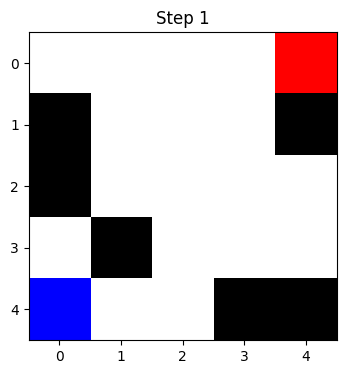

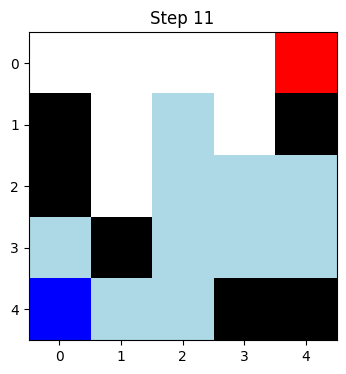

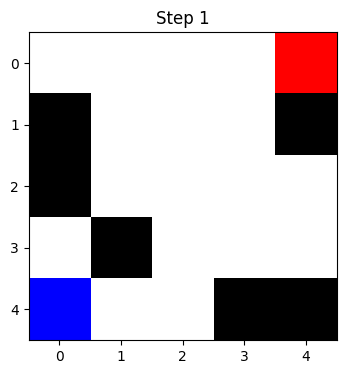

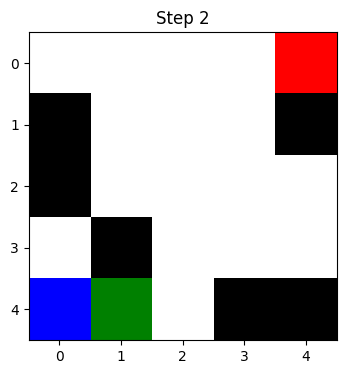

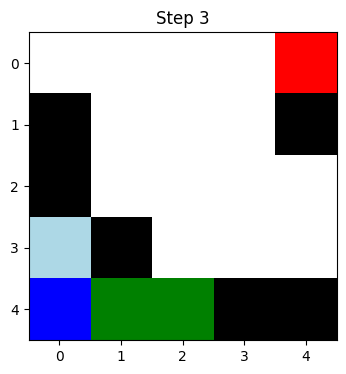

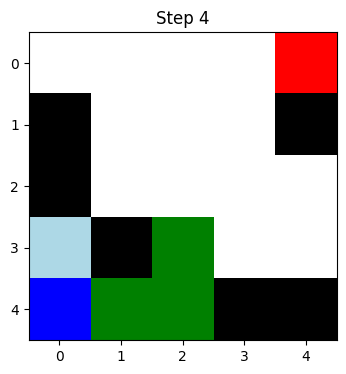

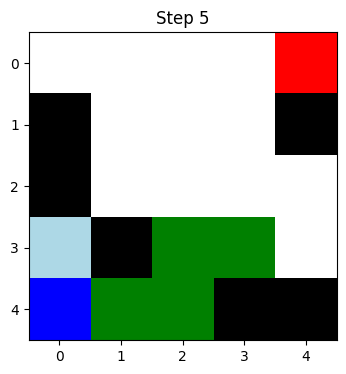

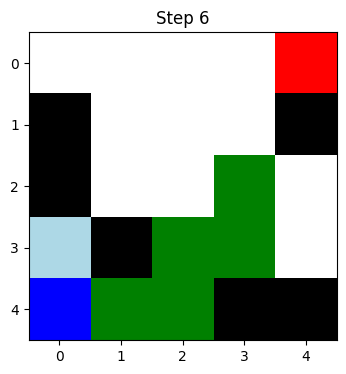

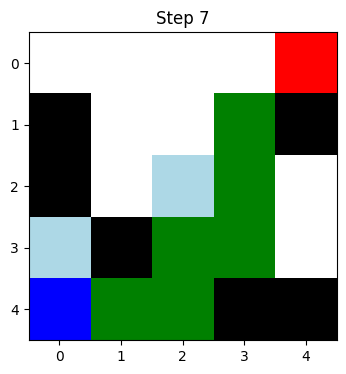

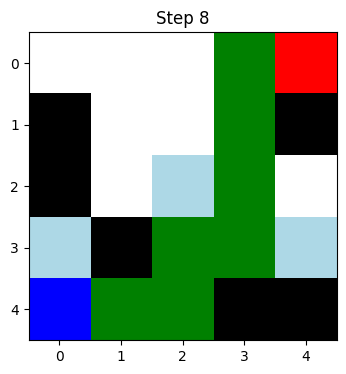

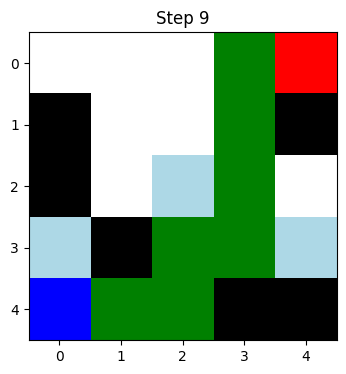

In [8]:
# Cell 6 (Now becomes the last cell with input):
# Get user input
print("A* Algorithm")
size = int(input("Grid size: "))
obstacle_prob = float(input("Obstacle probability (0-0.5): "))
start = (int(input("Start row: ")), int(input("Start column: ")))
end = (int(input("End row: ")), int(input("End column: ")))

# Run the visualization with user inputs
run_astar_visualization(size, obstacle_prob, start, end)

# A* Algorithm Implementation for Grid-Based Search Problems

## 1. Aim

The aim of this project is to implement the A* (A-star) algorithm for pathfinding on a grid-based environment, allowing a user to find the shortest path between a start point and an end point while avoiding obstacles.

## 2. Objectives

- Implement the A* algorithm using Python for grid-based pathfinding
- Create an interactive system that allows users to define grid parameters (size and obstacle density)
- Visualize the search process step-by-step to demonstrate how the A* algorithm explores the search space
- Visualize the final path found by the algorithm
- Demonstrate the efficiency of A* in finding the optimal path compared to uninformed search algorithms
- Provide educational insights into heuristic-based search algorithms

## 3. Expected Output

The program will produce:
- A randomly generated grid with user-specified size and obstacle density
- Visual representations of:
  - The search process (nodes visited during exploration)
  - The final path found from start to end
- Step-by-step visualizations showing:
  - White cells: Unvisited traversable spaces
  - Black cells: Obstacles
  - Light blue cells: Explored nodes
  - Green cells: The final path
  - Blue cell: Start position
  - Red cell: End position
- Console output indicating whether a path was found and its length

## 4. Software and Hardware Requirements

**Software Requirements:**
- Python 3.x
- Python libraries:
  - NumPy (for grid operations)
  - Matplotlib (for visualization)
  - Heapq (built-in, for priority queue implementation)
- Integrated Development Environment (IDE) or code editor

**Hardware Requirements:**
- Computer with sufficient memory to handle grid generation and visualization
- Minimum 4GB RAM recommended
- Display with resolution sufficient to view grid visualizations
- Keyboard for user input

## 5. Prerequisites

**Knowledge Prerequisites:**
- Basic understanding of Python programming
- Familiarity with:
  - Graph theory concepts (nodes, paths)
  - Search algorithms
  - Basic data structures (queues, lists)
  - Array manipulation

**Technical Prerequisites:**
- Python installation with required libraries
- Understanding of terminal/console input operations
- Basic knowledge of how to run Python scripts

## 6. Theory

### a. Necessary Definitions and Explanations

**A* Algorithm**: A* is an informed search algorithm used for pathfinding and graph traversal. It combines the advantages of both Dijkstra's algorithm (guaranteeing shortest path) and Greedy Best-First-Search (efficiency through heuristics).

**Nodes**: Represent positions in the grid. Each node contains:
- Position (x, y coordinates)
- Parent node (for path reconstruction)
- g-cost: The cost from the start node to this node
- h-cost: The estimated cost from this node to the end node (heuristic)
- f-cost: The sum of g-cost and h-cost

**Open List**: A priority queue containing nodes that need to be evaluated.

**Closed List**: A collection of nodes that have already been evaluated.

**Heuristic Function**: A function that estimates the cost from a node to the goal. In this implementation, Manhattan distance is used as the heuristic.

**Manhattan Distance**: The sum of the absolute differences between the coordinates of two points. For points (x₁, y₁) and (x₂, y₂), the Manhattan distance is |x₁ - x₂| + |y₁ - y₂|.

**Admissible Heuristic**: A heuristic that never overestimates the cost to reach the goal, ensuring the A* algorithm finds the optimal path.

### b. Computation

**Time Complexity**: 
- Worst case: O(b^d), where b is the branching factor (maximum number of successors of any node) and d is the depth of the goal.
- In practice, with an efficient heuristic, A* can be significantly faster.

**Space Complexity**: 
- O(b^d) to store all generated nodes.

**Computational Considerations**:
1. **Priority Queue Operations**: 
   - Insertion: O(log n)
   - Extraction of minimum: O(log n)
   - Where n is the number of nodes in the queue

2. **Path Reconstruction**: 
   - O(p) where p is the length of the final path

3. **Node Evaluation**:
   - Each node is evaluated once, with constant time operations for updating g, h, and f values

### c. Algorithms

**A* Algorithm Pseudocode**:

```
function A*(start, goal)
    // Initialize open list with start node
    openList = {start}
    
    // Initialize closed list as empty
    closedList = {}
    
    // Set g-cost of start node to 0
    start.g = 0
    
    // Set h-cost of start node using heuristic
    start.h = heuristic(start, goal)
    
    // Set f-cost of start node
    start.f = start.g + start.h
    
    while openList is not empty
        // Get node with lowest f-cost from open list
        current = node in openList with lowest f-cost
        
        // Remove current from open list
        openList.remove(current)
        
        // Add current to closed list
        closedList.add(current)
        
        // If current is goal, reconstruct and return path
        if current = goal
            return reconstruct_path(current)
        
        // Check all neighbors of current
        for each neighbor of current
            // Skip if neighbor is in closed list or is an obstacle
            if neighbor in closedList or is_obstacle(neighbor)
                continue
            
            // Calculate tentative g-cost
            tentative_g = current.g + distance(current, neighbor)
            
            // If neighbor is not in open list or new path is better
            if neighbor not in openList or tentative_g < neighbor.g
                // Set parent of neighbor to current
                neighbor.parent = current
                
                // Update costs
                neighbor.g = tentative_g
                neighbor.h = heuristic(neighbor, goal)
                neighbor.f = neighbor.g + neighbor.h
                
                // Add to open list if not already there
                if neighbor not in openList
                    openList.add(neighbor)
    
    // No path found
    return failure
```

**Path Reconstruction Pseudocode**:

```
function reconstruct_path(node)
    path = []
    
    // Trace back from goal to start using parent pointers
    while node is not null
        path.prepend(node.position)
        node = node.parent
    
    return path
```

### d. Example

Consider a simple 5x5 grid:
- Start position: (0, 0)
- End position: (4, 4)
- Obstacles at positions: (1, 2), (2, 2), (3, 2), (2, 3)

The A* algorithm would:
1. Start at (0, 0), calculate f = g + h = 0 + 8 = 8
2. Explore neighbors (0, 1) and (1, 0)
3. Continue exploring nodes with lowest f-cost
4. Avoid obstacles
5. Eventually find the path: (0,0) → (1,0) → (2,0) → (3,0) → (4,0) → (4,1) → (4,2) → (4,3) → (4,4)

The visualization would show:
- The gradual exploration of nodes (light blue)
- The final path from start to end (green)
- The obstacles that are avoided (black)

### e. Applications

The A* algorithm has numerous real-world applications:

1. **Video Games**: Widely used for pathfinding in games where characters need to navigate complex environments.

2. **Robotics**: Used in autonomous robots for planning movements and avoiding obstacles.

3. **GPS and Navigation Systems**: Finding optimal routes between locations considering roads, traffic, and other constraints.

4. **Network Routing**: Determining efficient paths for data packets in computer networks.

5. **Logistics and Transportation**: Planning delivery routes and optimizing fleet management.

6. **AI Problem Solving**: Solving puzzles like the 8-puzzle, 15-puzzle, and Rubik's cube.

7. **Map Applications**: Finding directions between locations considering various factors like distance, time, and transportation modes.

8. **Procedural Content Generation**: Creating maps and levels in games that are guaranteed to be solvable.

9. **Supply Chain Optimization**: Finding efficient paths for goods movement through complex supply networks.

10. **Motion Planning**: Planning movements for robotic arms and other mechanical systems.

## 7. Conclusion

The A* algorithm implementation for grid-based search problems demonstrates an efficient and optimal pathfinding solution. The algorithm successfully balances the need to find the shortest path with computational efficiency by using a heuristic function.

Key advantages of the A* algorithm include:

1. **Optimality**: When using an admissible heuristic like Manhattan distance, A* guarantees finding the shortest path if one exists.

2. **Efficiency**: By using a heuristic to guide the search, A* typically explores fewer nodes than uninformed search algorithms like Dijkstra's or breadth-first search.

3. **Completeness**: A* will always find a path if one exists, provided there is sufficient memory.

4. **Flexibility**: The heuristic function can be tailored to different problem domains, making A* adaptable to various applications.

The implementation showcases these advantages through visualization, allowing users to observe how the algorithm explores the grid and ultimately constructs the optimal path. The step-by-step visualization helps in understanding the underlying principles of informed search algorithms.

The project demonstrates how theoretical computer science concepts can be applied to practical problems, providing insights into algorithmic thinking and problem-solving. The interactive nature of the implementation, allowing users to specify grid parameters, makes it a valuable educational tool for understanding pathfinding algorithms.

In real-world applications, the principles demonstrated in this grid-based A* implementation can be extended to more complex environments and constraints, showcasing the algorithm's versatility and power in solving search problems efficiently.